#Analise do Dataset "Crop Production & Climate Change" link: https://www.kaggle.com/datasets/thedevastator/the-relationship-between-crop-production-and-cli

O DS possue dados da produção de arroz, soja, milho e trigo de diversos países,oq quais são apresentados em toneladas por hectare, em milhares de hectares e em milhares de toneladas.

In [41]:
# Importa as bibliotécas
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
#Cria o Data Frame
df = pd.read_csv("crop_production.csv")

In [43]:
#Verificação do DF
display(df)
print(df.describe())

,index,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,0,AUS,CROPYIELD,RICE,TONNE_HA,A,1990,8.314607,NaN
1,1,AUS,CROPYIELD,RICE,TONNE_HA,A,1991,8.394737,NaN
2,2,AUS,CROPYIELD,RICE,TONNE_HA,A,1992,8.094340,NaN
3,3,AUS,CROPYIELD,RICE,TONNE_HA,A,1993,8.336000,NaN
4,4,AUS,CROPYIELD,RICE,TONNE_HA,A,1994,8.537815,NaN
...,...,...,...,...,...,...,...,...,...
20561,20561,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2021,37010.208830,NaN
20562,20562,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2022,37069.214850,NaN
20563,20563,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2023,37143.459750,NaN
20564,20564,OECD,CROPYIELD,SOYBEAN,THND_HA,A,2024,37013.651900,NaN


              index          TIME         Value  Flag Codes
count  20566.000000  20566.000000  2.056600e+04         0.0
mean   10282.500000   2007.591170  1.249281e+04         NaN
std     5937.037154     10.369489  5.960529e+04         NaN
min        0.000000   1970.000000  0.000000e+00         NaN
25%     5141.250000   1999.000000  1.961877e+00         NaN
50%    10282.500000   2008.000000  2.560970e+01         NaN
75%    15423.750000   2017.000000  1.563000e+03         NaN
max    20565.000000   2025.000000  1.146044e+06         NaN


##Visialisação do DF

In [38]:
contagemSubjects = df['SUBJECT'].value_counts()
contagemMeasure = df['MEASURE'].value_counts()
contagemIndicador = df['INDICATOR'].value_counts()
contagemFrequency = df['FREQUENCY'].value_counts()
display(contagemMeasure)
display(contagemFrequency)

TONNE_HA      136
THND_TONNE    136
THND_HA       136
Name: MEASURE, dtype: int64

A    408
Name: FREQUENCY, dtype: int64

##Limpando o DF

In [44]:
df = df[df['TIME'] < 2024]

In [45]:
df = df.drop(columns = ['INDICATOR', 'index', 'Flag Codes', 'FREQUENCY'])

In [46]:
dfBrazil = df.loc[(df['LOCATION'] == 'BRA')]
display(dfBrazil)

,LOCATION,SUBJECT,MEASURE,TIME,Value
756,BRA,RICE,TONNE_HA,1990,1.183770
757,BRA,RICE,TONNE_HA,1991,1.496360
758,BRA,RICE,TONNE_HA,1992,1.439968
759,BRA,RICE,TONNE_HA,1993,1.537312
760,BRA,RICE,TONNE_HA,1994,1.601090
...,...,...,...,...,...
20210,BRA,SOYBEAN,TONNE_HA,2019,3.122795
20211,BRA,SOYBEAN,TONNE_HA,2020,3.149576
20212,BRA,SOYBEAN,TONNE_HA,2021,3.180483
20213,BRA,SOYBEAN,TONNE_HA,2022,3.212163


##Subdividindo o DF

In [47]:
dfBrasilRice = dfBrazil.loc[(dfBrazil['SUBJECT'] == 'RICE')]
dfBrasilSoy = dfBrazil.loc[(dfBrazil['SUBJECT'] == 'SOYBEAN')]
dfBrasilWheat = dfBrazil.loc[(dfBrazil['SUBJECT'] == 'WHEAT')] #Trigo
dfBrasilMaize = dfBrazil.loc[(dfBrazil['SUBJECT'] == 'MAIZE')] #Milho

In [48]:
dfBrasilRiceTONNE_HA = dfBrasilRice.loc[(dfBrasilRice['MEASURE'] == 'TONNE_HA')]
dfBrasilRiceTHND_TONNE  = dfBrasilRice.loc[(dfBrasilRice['MEASURE'] == 'THND_TONNE')]
dfBrasilRiceTHND_HA  = dfBrasilRice.loc[(dfBrasilRice['MEASURE'] == 'THND_HA')]

In [50]:
dfBrasilSoyTONNE_HA = dfBrasilSoy.loc[(dfBrasilSoy['MEASURE'] == 'TONNE_HA')]
dfBrasilSoyTHND_TONNE  = dfBrasilSoy.loc[(dfBrasilSoy['MEASURE'] == 'THND_TONNE')]
dfBrasilSoyTHND_HA  = dfBrasilSoy.loc[(dfBrasilSoy['MEASURE'] == 'THND_HA')]

In [64]:
dfBrasilWheatTONNE_HA = dfBrasilWheat.loc[(dfBrasilWheat['MEASURE'] == 'TONNE_HA')]
dfBrasilWheatTHND_TONNE  = dfBrasilWheat.loc[(dfBrasilWheat['MEASURE'] == 'THND_TONNE')]
dfBrasilWheatTHND_HA  = dfBrasilWheat.loc[(dfBrasilWheat['MEASURE'] == 'THND_HA')]

##Gráficos

###Arroz

Text(0.5, 1.0, 'Produção Brasileira de Arroz por Hectar')

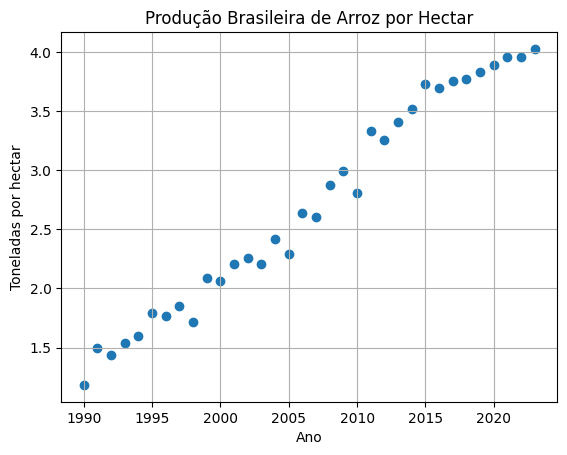

In [67]:
plt.scatter(dfBrasilRiceTONNE_HA['TIME'], dfBrasilRiceTONNE_HA['Value'])
plt.grid(True)
plt.ylabel('Toneladas por hectar')
plt.xlabel('Ano')
plt.title('Produção Brasileira de Arroz por Hectar')

Text(0.5, 1.0, 'Produção Brasileira de Arroz por Toneladas')

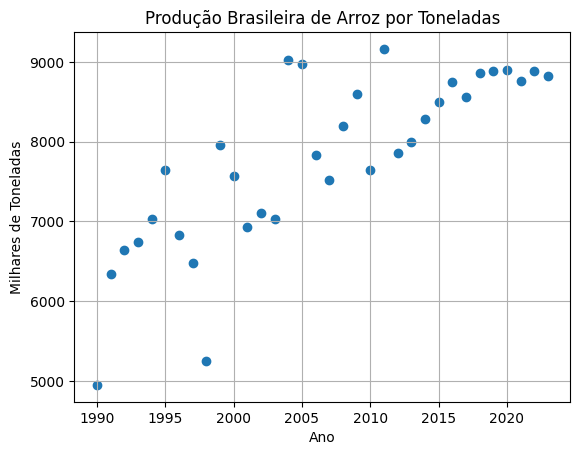

In [69]:
plt.scatter(dfBrasilRiceTHND_TONNE['TIME'], dfBrasilRiceTHND_TONNE['Value'])
plt.grid(True)
plt.ylabel('Milhares de Toneladas')
plt.xlabel('Ano')
plt.title('Produção Brasileira de Arroz por Toneladas')

Text(0.5, 1.0, 'Quantidade de Hectares para Produção Brasileira de Arroz')

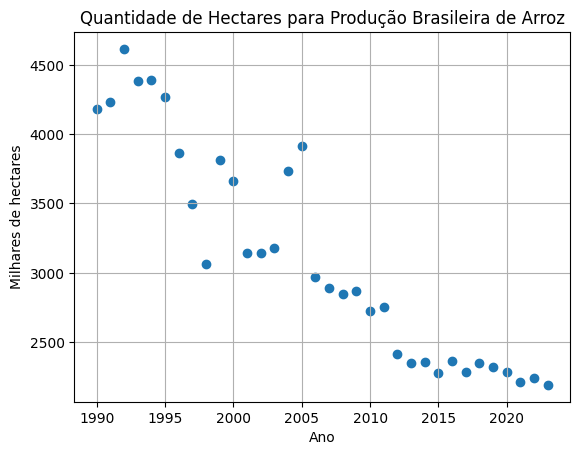

In [70]:
plt.scatter(dfBrasilRiceTHND_HA['TIME'], dfBrasilRiceTHND_HA['Value'])
plt.grid(True)
plt.ylabel('Milhares de hectares')
plt.xlabel('Ano')
plt.title('Quantidade de Hectares para Produção Brasileira de Arroz')

###Trigo

Text(0.5, 1.0, 'Produção Brasileira de Trigo por Hectar')

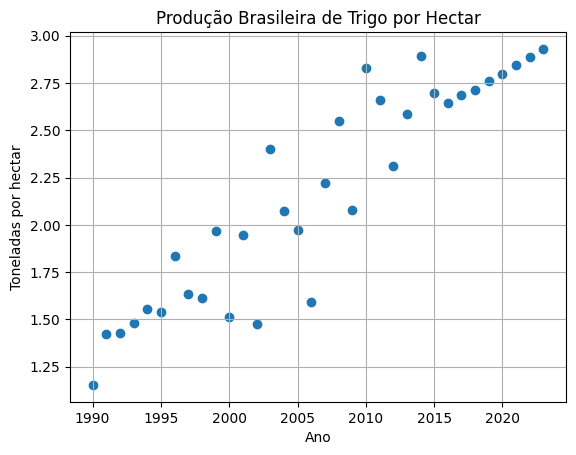

In [71]:
plt.scatter(dfBrasilWheatTONNE_HA['TIME'], dfBrasilWheatTONNE_HA['Value'])
plt.grid(True)
plt.ylabel('Toneladas por hectar')
plt.xlabel('Ano')
plt.title('Produção Brasileira de Trigo por Hectar')

Text(0.5, 1.0, 'Produção Brasileira de Trigo por Toneladas')

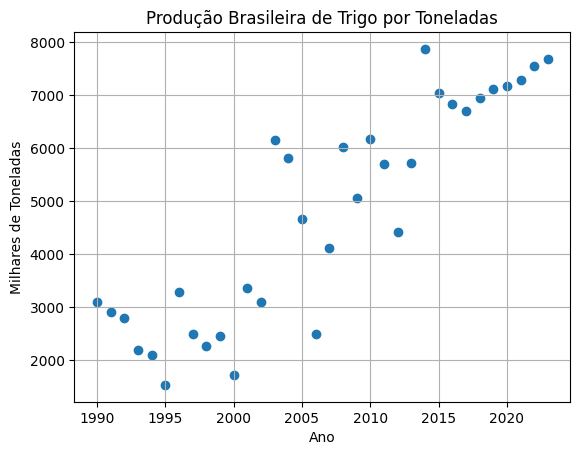

In [72]:
plt.scatter(dfBrasilWheatTHND_TONNE['TIME'], dfBrasilWheatTHND_TONNE['Value'])
plt.grid(True)
plt.ylabel('Milhares de Toneladas')
plt.xlabel('Ano')
plt.title('Produção Brasileira de Trigo por Toneladas')

Text(0.5, 1.0, 'Quantidade de Hectares para Produção Brasileira de Trigo')

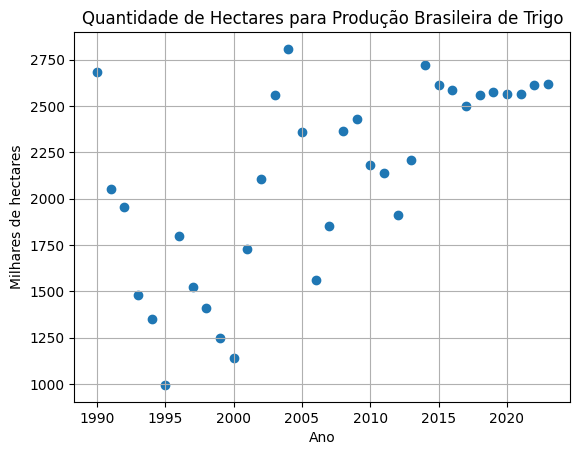

In [73]:
plt.scatter(dfBrasilWheatTHND_HA['TIME'], dfBrasilWheatTHND_HA['Value'])
plt.grid(True)
plt.ylabel('Milhares de hectares')
plt.xlabel('Ano')
plt.title('Quantidade de Hectares para Produção Brasileira de Trigo')